In [1]:
from math import *
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
L2 = 1;
N = 12;
d = 0.36;
Beta = 1;
p = N**(-.032);
Lm = 0.25;

def heaviside(x):
    if(x<0):
        return 0;
    return 1;

    
#     % N = Integer between 6 and 12
#     % K = 0.3 to 0.4 N/m ->
#     % Lm = 1.5 A -> 0.25
#     % L = 6 A -> 1
#     % L2 = 3 to 6 A -> 0.5 to 1
#     % d = 3.4 A -> 0.567
    

In [3]:
def DEAllEnergies(t,Z) :
    z1 = Z[0];
    z2 = Z[1];
    z1dot = Z[2];
    z2dot = Z[3];
    CouplingTerm1 = -1*(sqrt( (z2 - z1)**2 + L2**2 )- L2)*(z1 - z2)/(sqrt( (z2 - z1)**2 + L2**2 ));
    CouplingTerm2 = -1*CouplingTerm1;
    DampingTerm1 = -1*Beta*z1dot;
    DampingTerm2 = -1*Beta*z2dot;
    PotentialTerms1H =  N*z1*z1 + p*N*d*d/(2);
    PotentialTerms2H =  N*z2*z2 + p*N*d*d/(2);
    PotentialTerms1L = -N*z1 + N*z1*z1 + N*(d**4)/(d**2 + z1**2) + p*N*d*d/(2) + N*d*d*z1/sqrt(d*d+z1*z1);
    PotentialTerms2L = -N*z2 + N*z2*z2 + N*(d**4)/(d**2 + z2**2) + p*N*d*d/(2) + N*d*d*z2/sqrt(d*d+z2*z2);
    Zdot = [0,0,0,0];
    Zdot[0] = z1dot;
    Zdot[1] = z2dot;
    Zdot[2] = (DampingTerm1 + CouplingTerm1  + PotentialTerms1L*heaviside(z1-Lm) + PotentialTerms1H*heaviside(Lm-z1));
    Zdot[3] = (DampingTerm2 + CouplingTerm2  + PotentialTerms2L*heaviside(z2-Lm) + PotentialTerms2H*heaviside(Lm-z2));
    return Zdot;

In [26]:
def Solver(Z0,Ti,Tf,h=0.1):
    t = np.arange(Ti,Tf,h);
    Z =[];
    k1 = [];
    k2 = [];
    k3 = [];
    k4 = [];
    H = np.array([h,h,h,h]);
    for i in t:
        k1 = H*DEAllEnergies(i,Z0);
        k2 = H*DEAllEnergies(i + h/2,Z0 + k1/2);
        k3 = H*DEAllEnergies(i + h/2,Z0 + k2/2);
        k4 = H*DEAllEnergies(i + h,Z0 + k3);
        Znew = [];
        Znew = Z0 + (k1 + 2*k2 + 2*k3 + k4)/6 ;
        Z0 = Znew;
        Z.append(Z0);
    return t,Z;



SyntaxError: 'return' outside function (<ipython-input-26-fde41d34a1d8>, line 18)

In [24]:
def DataCaputure(X0,Ti,Tf,h=0.1):
    t,Z = Solver(X0,Ti,Tf,h)
    Z1 = []
    for i in Z:
        Z1.append(i[0]);
    Z2 = []
    for i in Z:
        Z2.append(i[1]);
    Z1dot = []
    for i in Z:
        Z1dot.append(i[2]);
    Z2dot = []
    for i in Z:
        Z2dot.append(i[3]);
    return (t,Z1,Z2,Z1dot,Z2dot)


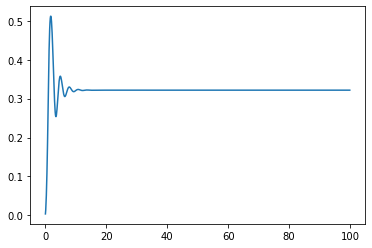

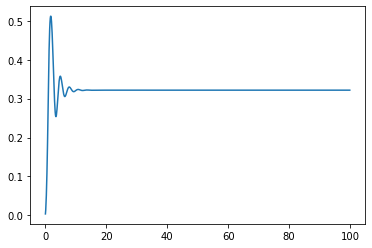

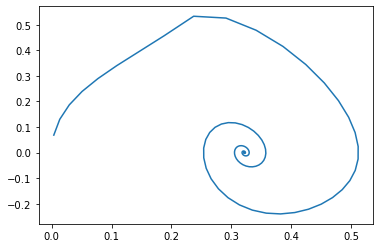

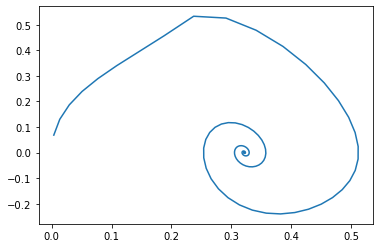

In [25]:

t,Z1,Z2,Z1dot,Z2dot = DataCaputure([0,0,0,0],0,100)
fig1 = plt.figure(1)
plt.plot(t,Z1)

fig2 = plt.figure(2)
plt.plot(t,Z2)

fig3 = plt.figure(3)
plt.plot(Z1,Z1dot)

fig4 = plt.figure(4)
plt.plot(Z2,Z2dot)

In [ ]:

sol = solve_ivp(DEAllEnergies,T,X0)
t = sol.t;
y = sol.y;

In [39]:
def rKN(x, fx, n, hs):
    k1 = []
    k2 = []
    k3 = []
    k4 = []
    xk = []
    for i in range(n):
        k1.append(fx[i](x)*hs)
    for i in range(n):
        xk.append(x[i] + k1[i]*0.5)
    for i in range(n):
        k2.append(fx[i](xk)*hs)
    for i in range(n):
        xk[i] = x[i] + k2[i]*0.5
    for i in range(n):
        k3.append(fx[i](xk)*hs)
    for i in range(n):
        xk[i] = x[i] + k3[i]
    for i in range(n):
        k4.append(fx[i](xk)*hs)
    for i in range(n):
        x[i] = x[i] + (k1[i] + 2*(k2[i] + k3[i]) + k4[i])/6
    return x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

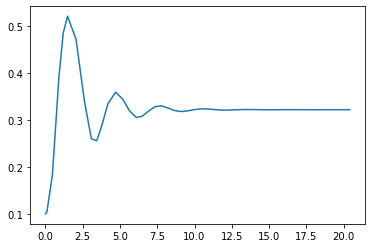

In [1]:
import seaborn as sns